In [101]:
import pandas as pd
import seaborn as sns

In [102]:
df = pd.read_csv("Pokemon.csv")

In [103]:
display(df)

,ID,Name,HP,Attack,Special_Attack,Defence,Special_Defence,Speed,Generation,Type1,Type2,Ability 1,Ability 2,Hidden Ability
0,1,bulbasaur,45,49,49,65,65,45,1,grass,poison,overgrow,NaN,chlorophyll
1,2,ivysaur,60,62,63,80,80,60,1,grass,poison,overgrow,NaN,chlorophyll
2,3,venusaur,80,82,83,100,100,80,1,grass,poison,overgrow,NaN,chlorophyll
3,4,charmander,39,52,43,60,50,65,1,fire,NaN,blaze,NaN,solar-power
4,5,charmeleon,58,64,58,80,65,80,1,fire,NaN,blaze,NaN,solar-power
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,901,ursaluna,130,140,105,45,80,50,8,ground,normal,guts,bulletproof,unnerve
901,902,basculegion-male,120,112,65,80,75,78,8,water,ghost,swift-swim,adaptability,mold-breaker
902,903,sneasler,80,130,60,40,80,120,8,fighting,poison,pressure,unburden,poison-touch
903,904,overqwil,85,115,95,65,65,85,8,dark,poison,poison-point,swift-swim,intimidate


In [104]:
def strongest_pokemon(type, OffenceOrDefence):
    filtered_df = df[(df["Type1"] == type) | (df["Type2"] == type)]
    filtered_df = filtered_df.assign(
        Preferred_Attack = filtered_df[['Attack', 'Special_Attack']].max(axis=1)
    )
    if OffenceOrDefence.lower() == "offence":
        offence_filter = filtered_df.query("Preferred_Attack >= 110 and Speed >=100")
        graph = sns.pointplot(data=offence_filter, x="Preferred_Attack", y="Speed", hue="Name")
        sns.move_legend(graph, "upper left", bbox_to_anchor=(1, 1))
    if OffenceOrDefence.lower() == "defence":
        defence_filter = filtered_df.query("Defence >= 110 and Special_Defence >=110")
        graph = sns.pointplot(data=defence_filter, x="Defence", y="Special_Defence", hue="Name")
        sns.move_legend(graph, "upper left", bbox_to_anchor=(1, 1))

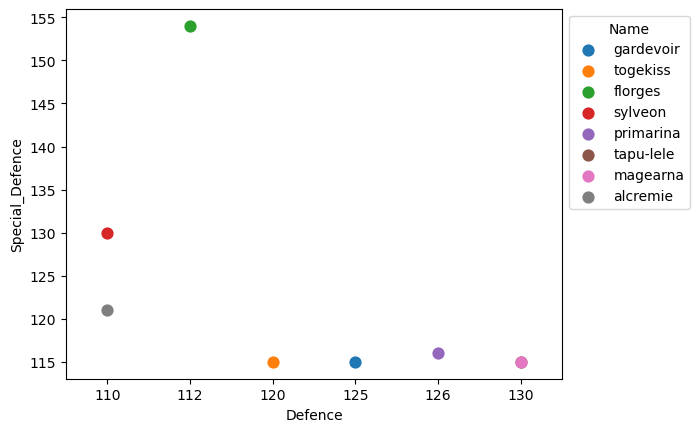

In [105]:
strongest_pokemon("fairy", "defence")

In [106]:
def type_average(type):
    def average_stat(stat):
        average_stat = []
        for i in filtered_df[stat]:
            average_stat.append(i)
        average_stat = sum(average_stat)/len(average_stat)
        return round(average_stat)
    filtered_df = df[(df["Type1"] == type) | (df["Type2"] == type)]
    dict = {
        "HP": average_stat("HP"),
        "Attack": average_stat("Attack"),
        "Defence": average_stat("Defence"),
        "Special_Attack": average_stat("Special_Attack"),
        "Special_Defence": average_stat("Special_Defence"),
        "Speed": average_stat("Speed")
    }
    return dict
print(type_average("fire"))

{'HP': 69, 'Attack': 81, 'Defence': 85, 'Special_Attack': 66, 'Special_Defence': 70, 'Speed': 74}
